
# Compute all-to-all connectivity in sensor space

Computes the Phase Lag Index (PLI) between all gradiometers and shows the
connectivity in 3D using the helmet geometry. The left visual stimulation data
are used which produces strong connectvitiy in the right occipital sensors.


In [3]:
# Author: Martin Luessi <mluessi@nmr.mgh.harvard.edu>
#
# License: BSD (3-clause)

import os.path as op

import mne
from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample
from mne_connectivity.viz import plot_connectivity_circle

Set parameters



In [4]:
data_path = sample.data_path()
raw_fname = op.join(data_path, 'MEG', 'sample',
                    'sample_audvis_filt-0-40_raw.fif')
event_fname = op.join(data_path, 'MEG', 'sample',
                      'sample_audvis_filt-0-40_raw-eve.fif')

# Setup for reading the raw data
raw = mne.io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)

# Add a bad channel
raw.info['bads'] += ['MEG 2443']

# Pick MEG gradiometers
picks = mne.pick_types(raw.info, meg='grad', eeg=False, stim=False, eog=True,
                       exclude='bads')

# Create epochs for the visual condition
event_id, tmin, tmax = 3, -0.2, 1.5  # need a long enough epoch for 5 cycles
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0), reject=dict(grad=4000e-13, eog=150e-6))


FileNotFoundError: Download location /Users/hugofluhr/mne_data as specified by MNE_DATA does not exist. Either create this directory manually and try again, or set MNE_DATA to an existing directory.

In [ ]:

# Compute connectivity for band containing the evoked response.
# We exclude the baseline period:
fmin, fmax = 4., 9.
sfreq = raw.info['sfreq']  # the sampling frequency
tmin = 0.0  # exclude the baseline period
epochs.load_data().pick_types(meg='grad')  # just keep MEG and no EOG now
con = spectral_connectivity_epochs(
    epochs, method='pli', mode='multitaper', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

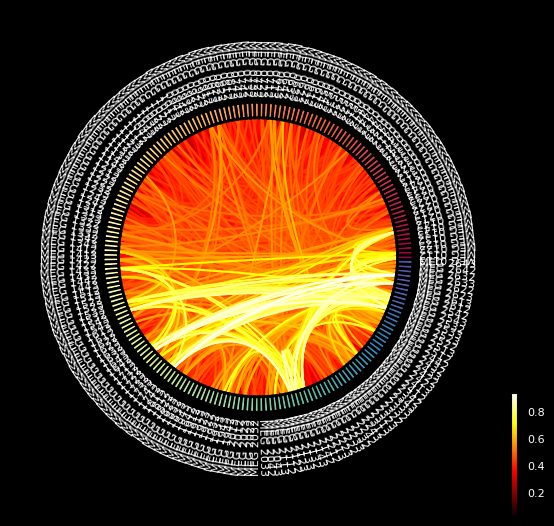

(<Figure size 800x800 with 2 Axes>, <PolarAxes: >)

In [14]:
# Now, visualize the connectivity in 3D:
plot_connectivity_circle(
    con.get_data(output='dense')[:, :, 0],
    epochs.ch_names)